In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNet,Lasso, Ridge, ElasticNetCV

In [ ]:
from inspect import unwrap
unwrap('archive (10).zip')

'archive (10).zip'

raw source csv file github repo :
https://raw.githubusercontent.com/RajeshB-0699/datasets_raw/refs/heads/main/Algerian_forest_fires_dataset.csv


classification problem (fire , not fire)

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/RajeshB-0699/datasets_raw/refs/heads/main/Algerian_forest_fires_dataset.csv')

In [4]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [5]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,127,9
top,1,7,2012,35,55,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [7]:
df.head(4)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire


In [8]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [9]:
df.loc[:122,"Region"] = 0
df.loc[124:,"Region"] = 1

In [10]:
df.drop(index=[122,123],inplace=True)

In [14]:
df.reset_index()

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
241,243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
242,244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
243,245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0


In [16]:
df.drop(columns =["index"], axis = 1, inplace = True)

KeyError: "['index'] not found in axis"

In [17]:
data = df

In [18]:
data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0


In [19]:
len(data), len(df)

(245, 245)

In [20]:
df[['Region']]

,Region
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
242,1.0
243,1.0
244,1.0
245,1.0


In [21]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1.0


In [22]:
df.drop(168,inplace=True)

In [23]:
data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0


In [24]:
df.iloc[122]

,124
day,day
month,month
year,year
Temperature,Temperature
RH,RH
Ws,Ws
Rain,Rain
FFMC,FFMC
DMC,DMC
DC,DC


In [25]:
df.reset_index(drop=True)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
240,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0


In [26]:
df.iloc[[120,121,122,123,124,125]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,0.0
121,30,9,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,0.0
124,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1.0
125,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1.0
126,2,6,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1.0
127,3,6,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,1.0


In [27]:
df = df[df['day'] != 'day']

In [28]:
df = df.reset_index(drop=True)


In [29]:
len(df)

243

In [30]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [31]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [32]:
df.rename(columns = {'Classes  ':'Classes'}, inplace = True)

In [33]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [34]:
df.columns = df.columns.str.strip()

In [35]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    object 
 1   month        243 non-null    object 
 2   year         243 non-null    object 
 3   Temperature  243 non-null    object 
 4   RH           243 non-null    object 
 5   Ws           243 non-null    object 
 6   Rain         243 non-null    object 
 7   FFMC         243 non-null    object 
 8   DMC          243 non-null    object 
 9   DC           243 non-null    object 
 10  ISI          243 non-null    object 
 11  BUI          243 non-null    object 
 12  FWI          243 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       243 non-null    float64
dtypes: float64(1), object(14)
memory usage: 28.6+ KB


In [37]:
cols = ['Temperature','RH','month','day','year','Ws']

for column in cols:
  df[column] = df[column].astype(int)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    object 
 7   FFMC         243 non-null    object 
 8   DMC          243 non-null    object 
 9   DC           243 non-null    object 
 10  ISI          243 non-null    object 
 11  BUI          243 non-null    object 
 12  FWI          243 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       243 non-null    float64
dtypes: float64(1), int64(6), object(8)
memory usage: 28.6+ KB


In [39]:
df.select_dtypes(include = 'object').columns

Index(['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'], dtype='object')

In [40]:
lst = []
for col in df.columns:
  if df[col].dtype == 'O':
    lst.append(col)


In [41]:
lst

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [42]:
[feature for feature in df.columns if df[feature].dtypes == 'O']

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [43]:
objects = df.select_dtypes(include = 'object').columns

In [44]:
objects

Index(['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'], dtype='object')

In [45]:
for i in objects:
  if i != 'Classes':
    df[i] = df[i].astype(float)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    float64
dtypes: float64(8), int64(6), object(1)
memory usage: 28.6+ KB


In [47]:
cols = [feature for feature in df.columns if df[feature].dtype != 'object']

In [48]:
cols

['day',
 'month',
 'year',
 'Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'Region']

In [49]:
df[cols].corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
day,1.000000,-0.000369,NaN,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781,0.000821
month,-0.000369,1.000000,NaN,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,0.001857
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.097227,-0.056781,NaN,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.269555
RH,-0.076034,-0.041252,NaN,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.402682
Ws,0.047812,-0.039880,NaN,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.181160
Rain,-0.112523,0.034822,NaN,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.040013
FFMC,0.224956,0.017030,NaN,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.222241
DMC,0.491514,0.067943,NaN,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.192089
DC,0.527952,0.126511,NaN,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,-0.078734


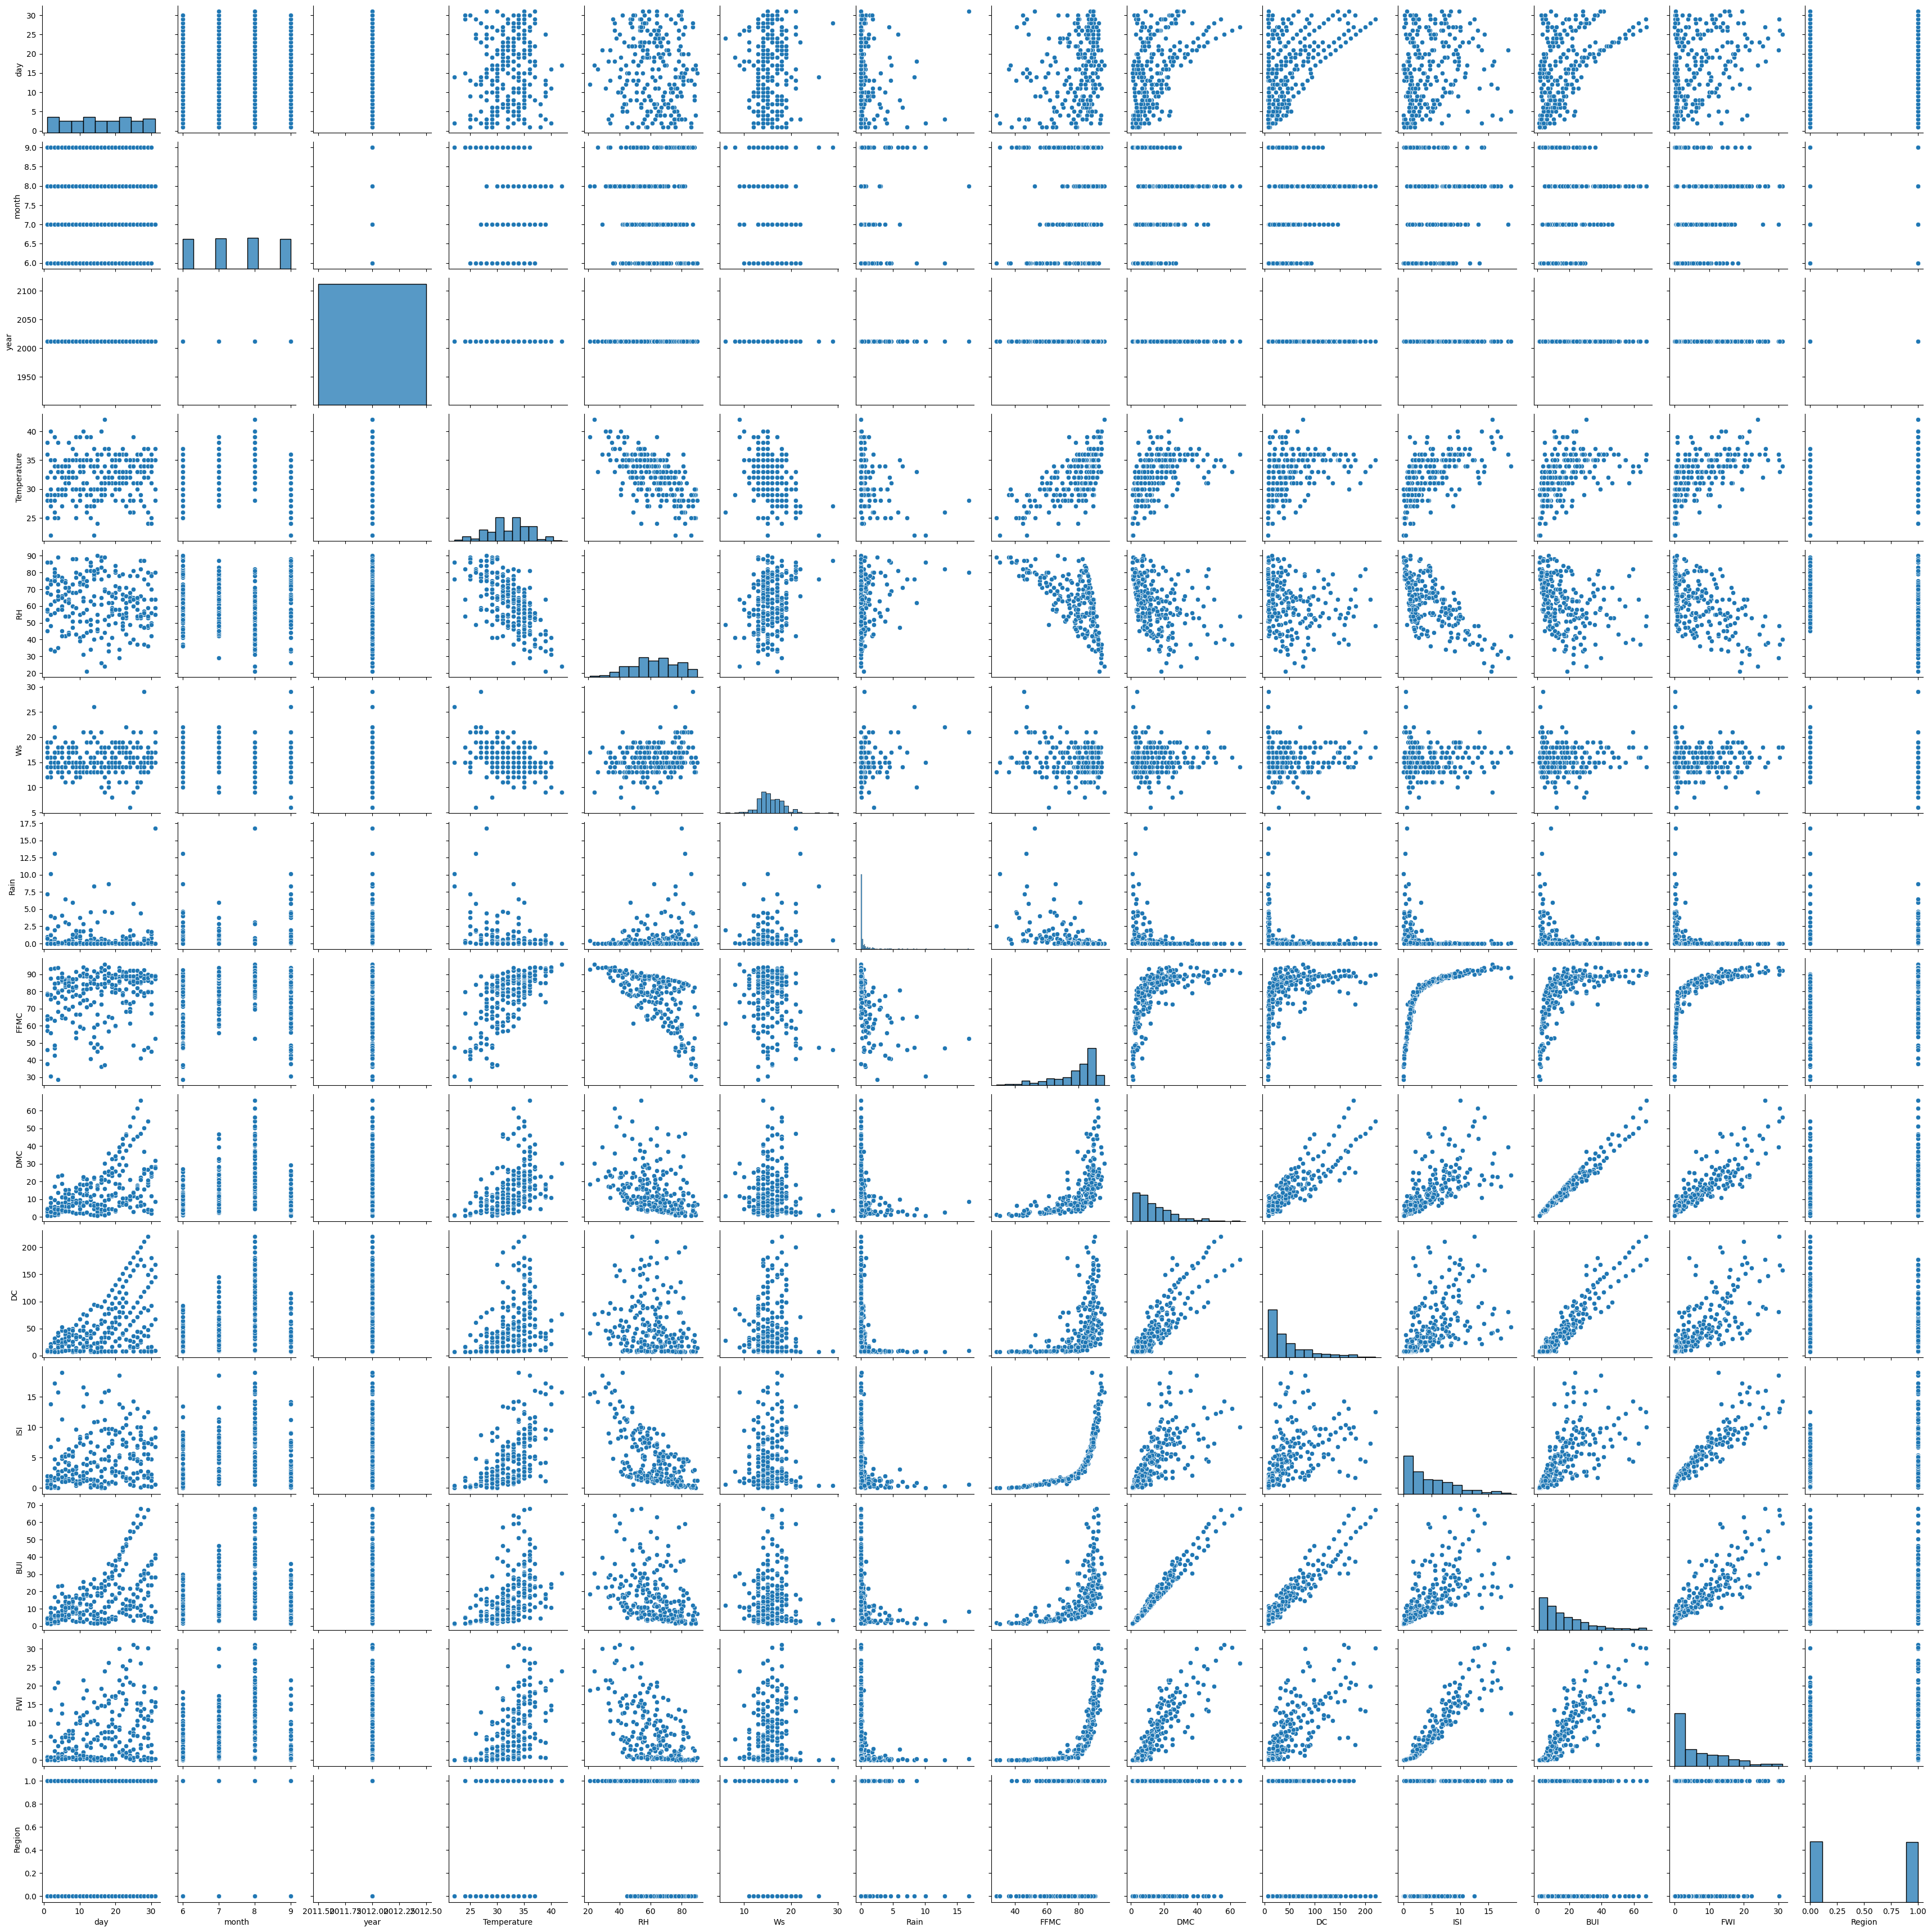

In [50]:
sns.pairplot(df[cols])

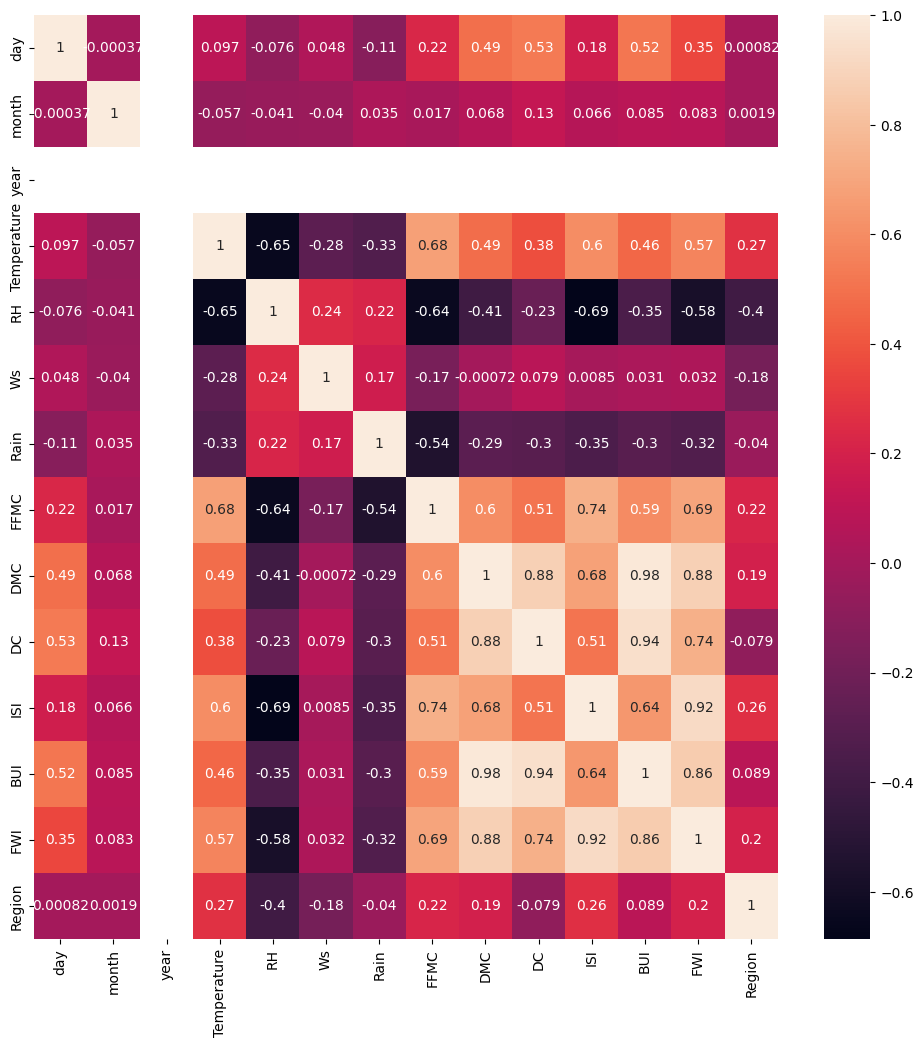

In [51]:
plt.figure(figsize = (12,12))
sns.heatmap(df[cols].corr(),annot= True)
plt.show()

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    float64
dtypes: float64(8), int64(6), object(1)
memory usage: 28.6+ KB


In [53]:
df.to_csv('fire_dataset_updated.csv')

**UPDATED DATASET DOWNLOAD FROM GITHUB RAW**

In [54]:
df = pd.read_csv('https://raw.githubusercontent.com/RajeshB-0699/datasets_raw/refs/heads/main/fire_dataset_updated.csv')

In [55]:
df.drop(columns = 'Unnamed: 0', inplace = True)

In [56]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1.0
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1.0
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0


In [57]:
df_copy = df.drop(columns = ['day','month','year'], axis=1)

In [58]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    object 
 11  Region       243 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 22.9+ KB


In [59]:
dfc =df_copy

In [60]:
dfc['Classes'].value_counts()

,count
Classes,
fire,131
not fire,101
fire,4
fire,2
not fire,2
not fire,1
not fire,1
not fire,1


In [61]:
dfc['Classes'] = dfc['Classes'].str.strip()

In [62]:
dfc.sample(4)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
146,34,70,16,0.0,86.0,12.8,25.6,5.4,12.7,6.7,fire,1.0
177,29,87,18,0.0,80.0,11.8,28.3,2.8,11.8,3.2,not fire,1.0
14,28,80,17,3.1,49.4,3.0,7.4,0.4,3.0,0.1,not fire,0.0
100,30,77,15,1.0,56.1,2.1,8.4,0.7,2.6,0.2,not fire,0.0


In [63]:
dfc['Classes'].value_counts()

,count
Classes,
fire,137
not fire,106


In [64]:
dfc['Classes'] = np.where(dfc['Classes']=='not fire', 0,1)

In [65]:
dfc.sample(4)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
32,32,76,20,0.7,63.1,2.6,9.2,1.3,3.0,0.5,0,0.0
35,32,63,14,0.0,87.0,10.9,37.0,5.6,12.5,6.8,1,0.0
48,35,59,17,0.0,88.1,12.0,52.8,7.7,18.2,10.9,1,0.0
34,33,66,14,0.0,85.9,7.6,27.9,4.8,9.1,4.9,1,0.0


In [66]:
dfc['Classes'].value_counts()

,count
Classes,
1,137
0,106


In [67]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

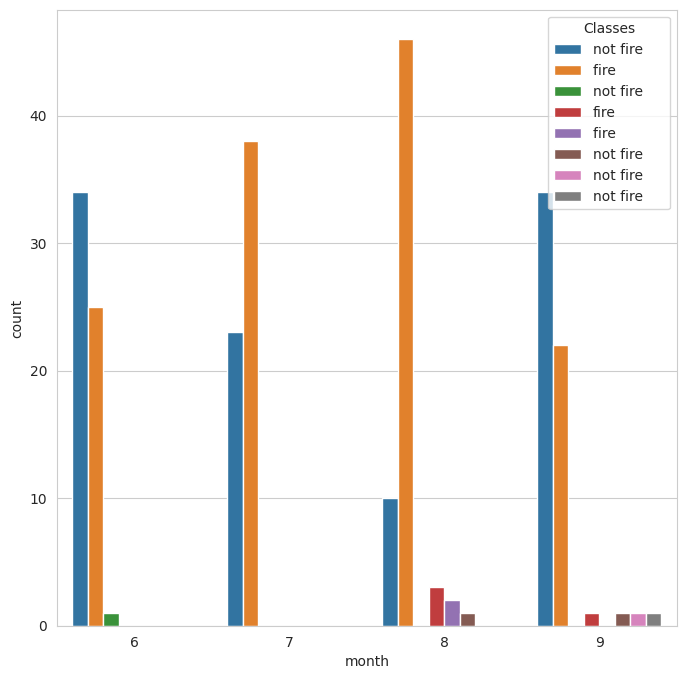

In [68]:
plt.figure(figsize=(8,8))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes', data = df);

In [69]:
X = dfc.drop(columns = ['FWI'],axis=1)
y = dfc['FWI']

In [70]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)

In [71]:
X_train.shape, y_train.shape,X_test.shape, y_test.shape

((182, 11), (182,), (61, 11), (61,))

In [73]:
X_train

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
97,29,74,19,0.1,75.8,3.6,32.2,2.1,5.6,0,0.0
141,31,72,14,0.2,60.2,3.8,8.0,0.8,3.7,0,1.0
192,40,31,15,0.0,94.2,22.5,46.3,16.6,22.4,1,1.0
68,32,60,18,0.3,77.1,11.3,47.0,2.2,14.1,0,0.0
119,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
106,24,82,15,0.4,44.9,0.9,7.3,0.2,1.4,0,0.0
14,28,80,17,3.1,49.4,3.0,7.4,0.4,3.0,0,0.0
92,25,76,17,7.2,46.0,1.3,7.5,0.2,1.8,0,0.0
179,34,59,16,0.0,88.1,19.5,47.2,7.4,19.5,1,1.0


In [74]:
y_train

,FWI
97,0.9
141,0.3
192,21.6
68,2.6
119,0.9
...,...
106,0.0
14,0.1
92,0.1
179,10.9


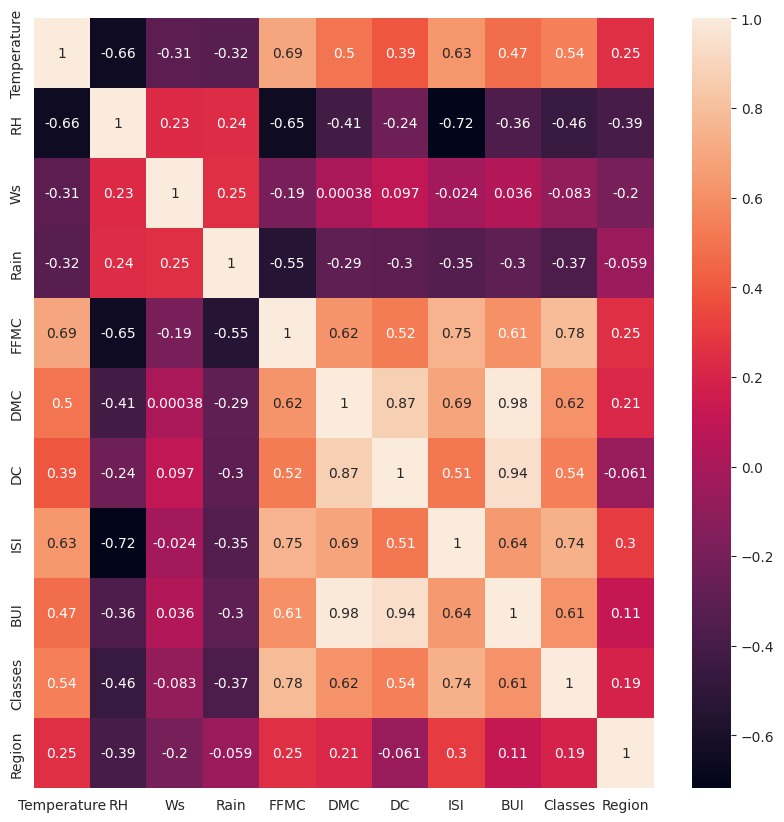

In [75]:
plt.figure(figsize=(10,10))
sns.heatmap(X_train.corr(),annot=True)
plt.show()

In [76]:
def correlation(dataset, threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j])> threshold:
        col_name = corr_matrix.columns[i]
        col_corr.add(col_name)
  return col_corr

In [77]:
correlation(X_train, 0.90)

{'BUI'}

In [78]:
corr_matrix = X_train.corr()

In [79]:
corr_matrix.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'Classes', 'Region'],
      dtype='object')

In [80]:
corr_matrix[['Temperature','Classes']]

,Temperature,Classes
Temperature,1.000000,0.542141
RH,-0.656095,-0.456876
Ws,-0.305977,-0.082570
Rain,-0.317512,-0.369357
FFMC,0.694768,0.781259
DMC,0.498173,0.617273
DC,0.390684,0.543581
ISI,0.629848,0.742977
BUI,0.473609,0.612239
Classes,0.542141,1.000000


In [81]:
def correlation_d(dataset, threshold):
  col_corr = set()
  corr = dataset.corr()
  for i in range(len(corr.columns)):
    for j in range(i):
      if abs(corr.iloc[i,j])> threshold:
        col_name = corr.columns[i]
        col_corr.add(col_name)
  return col_corr


In [105]:
corr_features = correlation_d(X_train, 0.80)

In [106]:
corr_features

set()

In [83]:
X_train.drop(corr_features, axis = 1, inplace = True)

In [84]:
X_train

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
97,29,74,19,0.1,75.8,3.6,2.1,0,0.0
141,31,72,14,0.2,60.2,3.8,0.8,0,1.0
192,40,31,15,0.0,94.2,22.5,16.6,1,1.0
68,32,60,18,0.3,77.1,11.3,2.2,0,0.0
119,32,47,14,0.7,77.5,7.1,1.8,0,0.0
...,...,...,...,...,...,...,...,...,...
106,24,82,15,0.4,44.9,0.9,0.2,0,0.0
14,28,80,17,3.1,49.4,3.0,0.4,0,0.0
92,25,76,17,7.2,46.0,1.3,0.2,0,0.0
179,34,59,16,0.0,88.1,19.5,7.4,1,1.0


In [85]:
X_test.drop(corr_features, axis = 1, inplace=True)

In [86]:
X_test.head(4)

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
24,31,64,15,0.0,86.7,14.2,5.7,1,0.0
6,33,54,13,0.0,88.2,9.9,6.4,1,0.0
152,28,58,18,2.2,63.7,3.2,1.2,0,1.0
232,34,58,13,0.2,79.5,18.7,2.1,0,1.0


In [87]:
from sklearn.preprocessing import StandardScaler
scaler2 =  StandardScaler()


In [88]:
X_train_scaled = scaler2.fit_transform(X_train)
X_test_scaled = scaler2.transform(X_test)

In [89]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

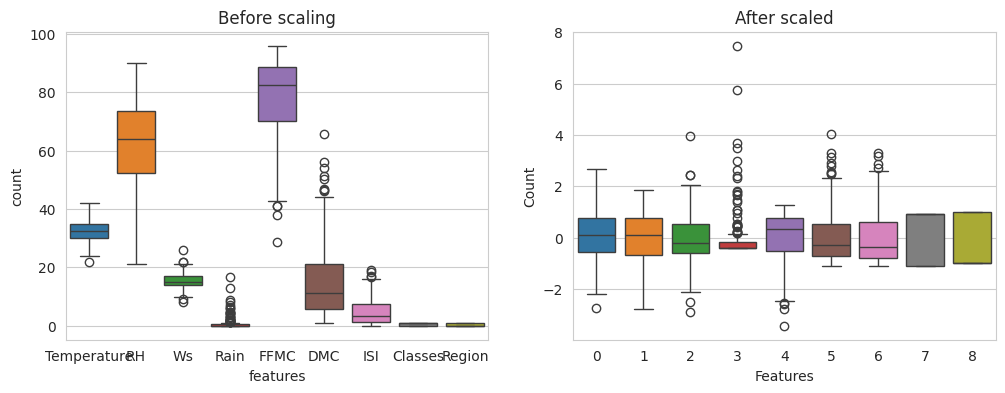

In [90]:
fig,axes = plt.subplots(1,2,figsize = (12,4))
axes = axes.flatten()

sns.boxplot(X_train,ax = axes[0])
axes[0].set_title("Before scaling")
axes[0].set_xlabel("features")
axes[0].set_ylabel("count")
sns.boxplot(X_train_scaled,ax= axes[1])
plt.xlabel("Features")
plt.ylabel("Count")
axes[1].set_title("After scaled")
plt.show()

mse: 0.6742766873791607
mae 0.5468236465249986
r2 0.9839977157632893


<ipython-input-91-bbe826ee1e2c>:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y_test,y_pred_lr, cmap='virdis');


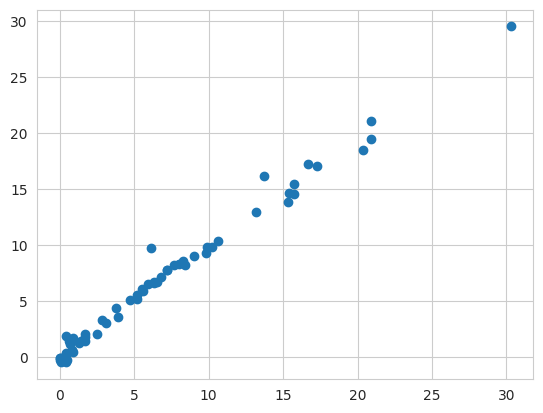

In [91]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred_lr = lr.predict(X_test_scaled)
mse = mean_squared_error(y_pred_lr, y_test)
mae = mean_absolute_error(y_pred_lr, y_test)
r2 = r2_score(y_pred_lr, y_test)

print("mse:",mse)
print("mae",mae)
print("r2", r2)

plt.scatter(y_test,y_pred_lr, cmap='virdis');

mse: 2.2483458918974772
mae 1.133175994914409
r2 0.926474232680569


<ipython-input-92-8d58a3e67e89>:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y_test,y_pred_ls, cmap='virdis');


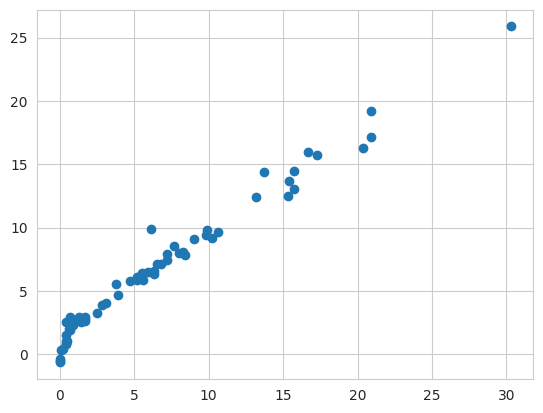

In [92]:
from sklearn.linear_model import Lasso
ls = Lasso()
ls.fit(X_train_scaled, y_train)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred_ls = ls.predict(X_test_scaled)
mse = mean_squared_error(y_pred_ls, y_test)
mae = mean_absolute_error(y_pred_ls, y_test)
r2 = r2_score(y_pred_ls, y_test)

print("mse:",mse)
print("mae",mae)
print("r2", r2)
plt.scatter(y_test,y_pred_ls, cmap='virdis');

In [93]:
lr.coef_, ls.coef_

(array([-0.03634495, -0.17441065,  0.00703214, -0.04108155, -0.82319823,
         3.6982583 ,  4.84057298,  0.40422124, -0.39259928]),
 array([ 0.        , -0.        ,  0.        , -0.        ,  0.        ,
         2.99025157,  4.00824747,  0.        , -0.        ]))

mse: 0.6949198918152074
mae 0.5642305340105692
r2 0.9834070933284212


<ipython-input-94-21b5a66f43b3>:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y_test,y_pred_ridge, cmap='virdis');


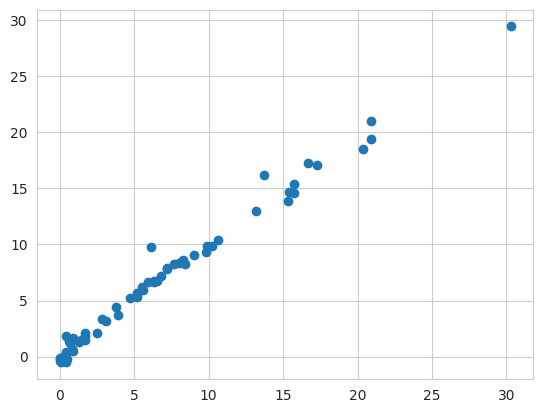

In [94]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred_ridge = ridge.predict(X_test_scaled)
mse = mean_squared_error(y_pred_ridge, y_test)
mae = mean_absolute_error(y_pred_ridge, y_test)
r2 = r2_score(y_pred_ridge, y_test)

print("mse:",mse)
print("mae",mae)
print("r2", r2)
plt.scatter(y_test,y_pred_ridge, cmap='virdis');

In [95]:
ridge.alpha

1.0

In [96]:
ridge.coef_, ls.coef_, lr.coef_

(array([-0.02692577, -0.20519212,  0.02554428, -0.04069202, -0.78583006,
         3.68286744,  4.74488835,  0.43423672, -0.38466214]),
 array([ 0.        , -0.        ,  0.        , -0.        ,  0.        ,
         2.99025157,  4.00824747,  0.        , -0.        ]),
 array([-0.03634495, -0.17441065,  0.00703214, -0.04108155, -0.82319823,
         3.6982583 ,  4.84057298,  0.40422124, -0.39259928]))

mse: 5.5172511010252245
mae 1.8822353634896005
r2 0.7814447243400926


<ipython-input-97-07d70026f191>:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y_test,y_pred_elastic, cmap='virdis');


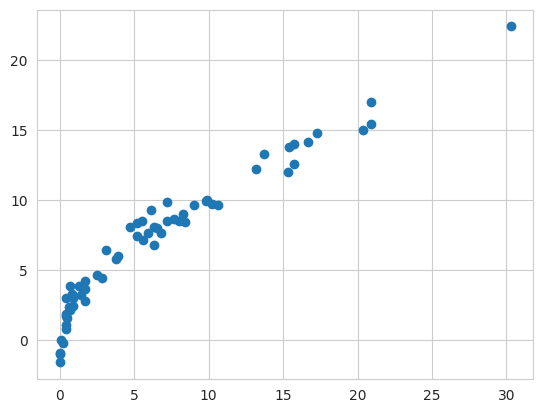

In [97]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
elastic.fit(X_train_scaled, y_train)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred_elastic = elastic.predict(X_test_scaled)
mse = mean_squared_error(y_pred_elastic, y_test)
mae = mean_absolute_error(y_pred_elastic, y_test)
r2 = r2_score(y_pred_elastic, y_test)

print("mse:",mse)
print("mae",mae)
print("r2", r2)
plt.scatter(y_test,y_pred_elastic, cmap='virdis');

In [98]:
elastic.intercept_, ridge.intercept_, ls.intercept_, lr.intercept_

(np.float64(7.156043956043956),
 np.float64(7.156043956043957),
 np.float64(7.156043956043957),
 np.float64(7.156043956043957))

In [99]:
elastic.alpha, elastic.coef_

(1.0,
 array([ 0.21700498, -0.46785751,  0.        , -0.        ,  0.37217213,
         2.36758116,  2.35779601,  0.87026661,  0.        ]))

In [100]:
elastic.l1_ratio

0.5

In [101]:
from sklearn.linear_model import LassoCV
LassoCV()

LassoCV()

In [102]:
import pickle


In [103]:
pickle.dump(scaler2, open('scaler.pkl', 'wb'))
pickle.dump(ridge, open('ridge.pkl','wb'))

In [104]:
dfc

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1.0
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1.0
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1.0
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1.0


In [107]:
updated_dfc = dfc.drop(columns = ['FWI'], axis = 1)
updated_dfc2 = updated_dfc.to_csv('dfc.csv')

In [108]:
dfc.to_csv('dfc2.csv')